# Машинное обучение 2 (Судный день)

## Домашнее задание 3:  Градиентный бустинг


### Общая информация

Дата выдачи: 28.11.2022

Мягкий дедлайн: 23:59MSK 11.12.2022

Жесткий дедлайн: 23:59MSK 14.12.2022

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### О задании

В этом задании вы поработаете с двумя пакетами для обучения градиентного бустинга

### Оценивание и штрафы

В сумме за задание можно получить $10$ баллов. Цена каждого задания указана около него в скобочках.


__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

## Часть 1: градиентный бустинг и классификация

В этой части мы будем прогнозировать задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.

In [2]:
import pandas as pd

df = pd.read_csv('flight_delays_train.csv')
print(df.shape)
df.head()

(100000, 9)


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


Давайте возьмём только целочисленные переменные `Distance` и `DepTime`.

In [3]:
from sklearn.model_selection import train_test_split

X = df[['Distance', 'DepTime']].values
y = df['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

Обучим два бустинга из двух самых популярных библиотек: `xgboost` и `catboost`.

In [4]:
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])

0.7016802830321851

In [5]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier()
model_cat.fit(X_train, y_train, verbose=False)
roc_auc_score(y_test, model_cat.predict_proba(X_test)[:, 1])

0.6981223674623012

Из коробки catboost отрабоатал лучше, чем XGBoost. И это мы ещё не использовали его главное приемущество, работу с категориальными фичами из коробки.

__[0.5 балла]__ посмотрите на категориальные переменные из датасета. Насколько они разнообразны? Есть ли в них редкие категории? Сделайте предобработку всех категориаьных переменных и обучите XGBoost. Измерьте его качество на тестовой выборке. 

Способ предобработки категориальных переменных вы можете выбрать на свой вкус. Это может быть как OHE с редкими категориями, перезаписанными в категорию `other`, так и аккуратно написанный трасформер для LavelEncoding.

In [6]:
# your code here ( ⚆ _ ⚆)

__[0.5 балла]__ обучите на той же самой выборке случайный лес. Бьёт ли бустинг случайный лес?

In [7]:
# your code here ( ⚆ ω ⚆)

__[1 балл]__ для catboost предобработку категориальных переменных делать не надо. Их достаточно перечислить в опции `cat_features`. Попробуйте обучить модель с их учётом, измерьте её качество на тестовой выборке. Отработал ли catboost лучше xgboost?

In [8]:
# your code here  ( ͡° ͜ʖ ͡°)

__[2 балла]__ Попробуем выжать максимум из наших бустингов. Получите 1 балл за преодоление порога roc_auc_score 0.72 и ещё 1 балл за преодоление порога 0.75. Для подбора гиперпараметров используйте валидационную выборку либо кросс-валидацию. В качестве библиотеки используйте optuna по аналогии с семенаром. 

На тестовой выборке должен быть сделан только финальный замер результата. 

__Что можно попробовать для catboost:__

- Включите опцию `plot=True`, чтобы отрисовывалась красивая картинка с метриками
- Используйте `eval_set`, `use_best_model` и `early_stopping_rounds` чтобы вовремя на валидационной выборке детектировать переобучение модели и останавливаться
- Попробуйте перебрать разные скорости обучения `learning_rate`, регуляризацию `l2_leaf_reg` и глубину деревьев `max_depth`
- Попробуйте перебрать любые другие параметры, за вдохновением можно обратиться [к туториалам из документации.](https://github.com/catboost/tutorials) Например, вот тут код с разными способами перебора [от GreedSearch до оптуны.](https://github.com/catboost/tutorials/tree/master/hyperparameters_tuning) Вам достаточно сделать базовый GreedSearch.
 

__Что можно попробовать для XGboost:__

- Попробуйте перебирать скорости обучения `learning_rate`, `max_depth`, `min_child_weight`, `gamma`, `colsample_bytree`. За что отвечают эти параметры [прочтите в документации](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters)


In [9]:
# your code here  ლ(ಠ益ಠლ)

__[1 балл]__ Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой.

In [10]:
# your code here   ⟅⎛ꌩωꌩ⎞⟆

__Ответ:__ 

__[1 балл]__ Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [11]:
# your code here  ¯\_(ツ)_/¯

__[1 балл]__ 
Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [12]:
# your code here ( ⚆ _ ⚆)

## Часть 2: градиентный бустинг и регрессия

Давайте попробуем поработать с бустингом на более маленьком датасете.


__Данные:__

В парке отдыхало $250$ групп туристов. Каждой группе был задан вопрос о том, сколько рыбы они поймали `count`. В каждой группе посчитали число детей `child`, число людей `persons`. Каждой группе отдыхающих задавали вопрос: приехали ли они с палатками `camper`. 

Колонки с координатами и информацией о ловле на живца нас интересовать не будут. Их мы удалим. 

In [13]:
df = pd.read_csv("fish.tsv", sep='\t')
df.drop(['xb', 'zg', 'livebait'], axis=1, inplace=True)
df.head()

,nofish,camper,persons,child,count
0,1,0,1,0,0
1,0,1,1,0,0
2,0,0,1,0,0
3,0,1,2,1,0
4,0,0,1,0,1


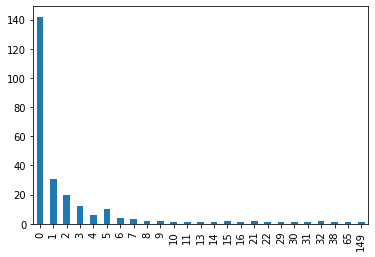

In [14]:
df['count'].value_counts().sort_index(ascending=True).plot(kind='bar');

Видно, что в данных о пойманной рыбе нули встречаются чаще всего. Специфичные данные требуют специфичных моделей. Будем предполагать, что:

- Число пойманной рыбы имеет распределение Пуассона 
- Вероятность того, что группа туристов не поймала ни одной рыбы моделируется отдельно

Предпримем первую попытку построить [zero inflated model.](https://en.wikipedia.org/wiki/Zero-inflated_model) Этот пункт решён за вас. Разберитесь в том, как именно мы выводим модель.

__Цель:__ вытащить нулевое значение и вероятность для него в отдельный параметр. 

__Делай раз:__  мы хотим, чтобы распределение Пуассона для нас работало, начиная с $X = 1$. В таком случае нам его надо сдвинуть вправо так, чтобы сумма вероятностей по-прежнему оставалась равна единице. Мы знаем, что 

$$
\sum_{k=0}^{\infty} P(X = k) = \sum_{k=0}^{\infty} \frac{\lambda^k e^{-\lambda}}{k!} = e^{-\lambda} + \sum_{k=1}^{\infty} \frac{\lambda^k e^{-\lambda}}{k!} = 1.
$$

Если мы решим оставить только сумму, начиная с единицы, получится, что 

$$
\sum_{k=1}^{\infty} \frac{\lambda^k e^{-\lambda}}{k!} = 1 - e^{-\lambda}.
$$

Чтобы перед нами было полноценное распределение и все вероятности в сумме давали $1$, нам надо поделить сумму слева на $1 - e^{-\lambda}$. Получается, что для распределения Пуассона, обрезанного со стороны нуля, формула для поиска вероятности выглядить как 

$$
P(X = k \mid X > 0) = \frac{1}{1 - e^{-\lambda}} \cdot \frac{\lambda^k e^{-\lambda}}{k!}.
$$

Можно получить эту формулу исходя не из интуции, а из формулы условной вероятности:

$$
P(X = k \mid X > 0) = \frac{P(X = k \cap X > 0)}{P(X > 0)} = \frac{\frac{\lambda^k e^{-\lambda}}{k!}}{1 - e^{-\lambda}}
$$


__Делай два:__ Теперь давайте построим смесь из двух распределений. Случайная величина $X$ будет принимать с вероятностью $p$ значение $0$, и с вероятностью $1 - p$ будет распределена по Пуассону со сдвигом: 

$$
\begin{aligned}
& P(X = 0) = p \\
& P(X = k) = (1 - p) \cdot \frac{1}{1 - e^{-\lambda}} \cdot \frac{\lambda^k e^{-\lambda}}{k!}.
\end{aligned}
$$

Построенная модель — это ещё не совсем то, что нам надо. У такой формулировки модели есть минус. Невозможно проверить гипотезу о том, что в нуле нет никаких особенностей. Если $p = 0$, то у нас просто-напросто не бывает нулевых значений, а нам надо при $p=0$ получить обычное распределение Пуассона. 

__Итоговая модель:__ Хочется, чтобы у нас была возможность протестировать такую гипотезу. Для этого ноль выносится в отдельную категорию не в результате обрезания распределения Пуассона, а немного иначе.  

Давайте домножим $P(X = k)$ на $(1-p)$, а потом просто вынесем $(1 - p) \cdot P(X = 0)$ в отдельное слагаемое. И тогда получится модель: 

$$
\begin{aligned}
& P(X = 0) = p + (1 - p) \cdot e^{-\lambda} \\
& P(X = k) = (1 - p) \cdot \frac{\lambda^k e^{-\lambda}}{k!}.
\end{aligned}
$$ 

Если $p=0$, то у нас получается распределение Пуассона. У нас возникает возможность проверить гипотезу $H_0$, состояшую в том, что в нуле нет никакого особого значения. Распределение Пуассона оказывается вложено в нашу более сложную модель в лучших традициях частотной статистики. 

----------------

__[1 балл]__ Будем использовать в качестве метрики MAE. Обучите кэтбуст на MAE. Подберите оптимальные гиперпараметры. Оцените качество итоговой модели на тесте. 

In [ ]:
# your code here ( ⚆ _ ⚆)

__[1 балл]__ Попробуйте обучить [пуассоновский бустинг.](https://github.com/catboost/tutorials/blob/master/regression/poisson.ipynb) Подберите оптимальные гиперпараметры. Проверьте улучшилось ли значение MAE на тестовой выборке.

In [ ]:
# your code here  ¯\_(ツ)_/¯

__[0.5 балла]__ Выведите логарифмическую функцию правдоподобия для Zero Inflated Model.

__Hint:__ Множителем $\frac{1}{y_1! \cdot \ldots \cdot y_n!}$ нужно пренебречь. Он не влияет на оптимизацию функции.

__Ответ:__

__[0.5 балла]__ [Вбейте свю функцию потерь](https://github.com/catboost/tutorials/tree/master/custom_loss) и обучите на неё кэтбуст. Попробуйте подобрать оптимальные гиперпараметры. Проверьте улучшилось ли значение MAE на тестовой выборке. 

In [ ]:
# your code here ( ⚆ ω ⚆)